### 1. Carregamento de Bibliotecas

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from entropy import *
import matplotlib.pyplot as plt

### 2. Tratamento dos dados de entrada

In [2]:
with open('resultados_40_novo.txt', 'r') as f:
    resultados = f.readlines()

sentences = []
num_try = []

for resultado in resultados:
    _, try_ = resultado.split(':')
    try_ = try_.strip()
    try_ = try_.split(',')
    try_[0] = try_[0].split('[')[1]
    try_[-1] = try_[-1].split(']')[0]
    try_ = [int(x) for x in try_]
    sentences.append(try_)

### 3. Cálculo dos limites superiores, inferiores e Entropia

In [3]:
upper_bounds = []
lower_bounds = []
entropy = []

for sentence in sentences:
    up = calc_upper_bound(sentence)
    lb = calc_lower_bound(sentence)
    upper_bounds.append(up)
    lower_bounds.append(lb)
    entropy.append(up)
    
final_entropy = np.mean(entropy)
final_entropy_std = np.std(entropy)

In [4]:
print('Entropia final:', final_entropy, "bps")
print('Desvio padrão:', final_entropy_std, "bps")

Entropia final: 3.259383009393831 bps
Desvio padrão: 0.3092007859024764 bps


### 4. Cálculo dos Ub, Lb, e Entropia com contextos variáveis (1 até 14)

In [5]:
upper_bounds_chart = []
lower_bounds_chart = []

for i in range(2, 16+1):
    upper_bounds = []
    lower_bounds = []
    entropy = []
    for sentence in sentences:
        # sentence = sentence[:i]
        up = calc_upper_bound(sentence[:i])
        lb = calc_lower_bound(sentence[:i])
        upper_bounds.append(up)
        lower_bounds.append(lb)
        
    upper_bounds_chart.append(np.mean(upper_bounds))
    lower_bounds_chart.append(np.mean(lower_bounds))

In [6]:
print('Intervalo da entropia para cada nível de contexto:')
for i in range(3, 16+1):
    a = (lower_bounds_chart[i-3], upper_bounds_chart[i-3])
    print(f"contexto {i - 2}: {a}")

Intervalo da entropia para cada nível de contexto:
contexto 1: (3.8450565632340226, 0.9512195121951219)
contexto 2: (1.8246428502427552, 1.5036616877130258)
contexto 3: (-2.222061810937625, 1.8780487804878048)
contexto 4: (-2.1544744097457618, 2.1547833997337507)
contexto 5: (-3.2813765276402513, 2.367443090134461)
contexto 6: (-2.771900572467567, 2.5569218106258016)
contexto 7: (-3.1942349259102647, 2.7175939314539916)
contexto 8: (-5.201284114868208, 2.8474487996545315)
contexto 9: (-5.538661674052781, 2.9670892084108647)
contexto 10: (-5.011493910558885, 3.035576817093902)
contexto 11: (-5.0861765495050495, 3.0965076735772503)
contexto 12: (-5.419917358529438, 3.1501630183596863)
contexto 13: (-5.2624068077015, 3.1897907617291668)
contexto 14: (-5.119443579142428, 3.259383009393831)


### 5. Visualização dos resultados

#### 5.1 Plotagem dos limites das entropias de acordo com o tamanho de contexto

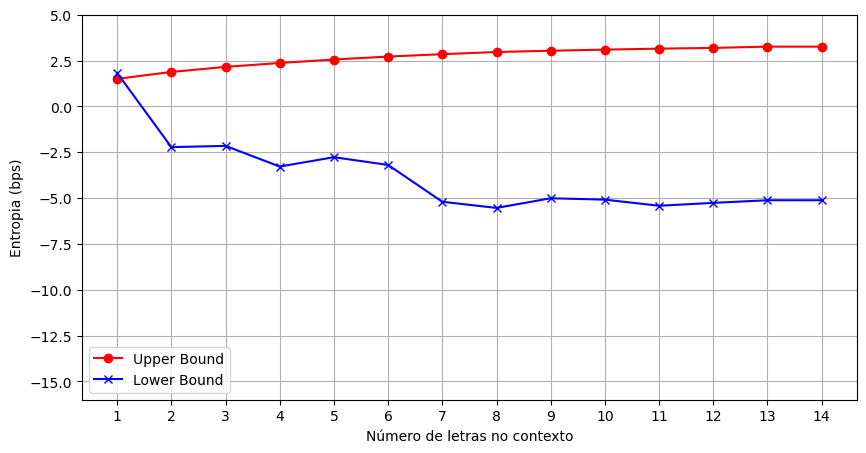

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 15), upper_bounds_chart[1:], label='Upper Bound', marker="o", color='red')
plt.plot(range(1, 15), lower_bounds_chart[1:], label='Lower Bound', marker="x", color='blue')
plt.ylim(-16, 5)
plt.xlabel('Número de letras no contexto')
plt.ylabel('Entropia (bps)')
plt.legend()
plt.xticks(range(1, 15), range(1, 15))
plt.grid()
plt.show()

#### 5.2 Tabela de Frequência de respostas dada a quantidade de contexto

In [8]:
table_df = pd.DataFrame(columns=[n for n in range(1, 16)], index=[n for n in range(1, 28)])
table_df.fillna(0, inplace=True)
table_df = pd.DataFrame(columns=[f"ctx_{n}" for n in range(1, 16)], index=[f"g_{n}" for n in range(1, 28)])
table_df.fillna(0, inplace=True)


for i in range(len(resultados)):
    for j in range(15):
        table_df.iloc[sentences[i][j] - 1, j] += 1

table_df

,ctx_1,ctx_2,ctx_3,ctx_4,ctx_5,ctx_6,ctx_7,ctx_8,ctx_9,ctx_10,ctx_11,ctx_12,ctx_13,ctx_14,ctx_15
g_1,4,7,3,5,3,5,8,9,9,7,9,10,12,14,9
g_2,2,3,2,3,4,6,5,5,1,1,6,3,3,1,6
g_3,7,3,5,1,3,5,1,6,2,4,2,1,1,1,6
g_4,1,5,1,0,0,0,3,3,5,1,4,4,1,1,2
g_5,0,1,4,2,3,4,3,0,2,1,1,1,4,3,0
g_6,1,2,3,2,2,3,1,0,1,3,0,2,2,2,1
g_7,6,1,3,2,0,3,1,1,0,3,0,2,2,4,1
g_8,1,0,5,2,2,1,3,0,0,0,1,1,1,1,1
g_9,0,0,1,2,0,0,1,2,1,0,4,1,4,1,0
g_10,1,0,2,0,2,2,3,2,1,1,0,1,0,0,1


#### 5.3 Tabela de Frequência de momentos de acertos do GPT

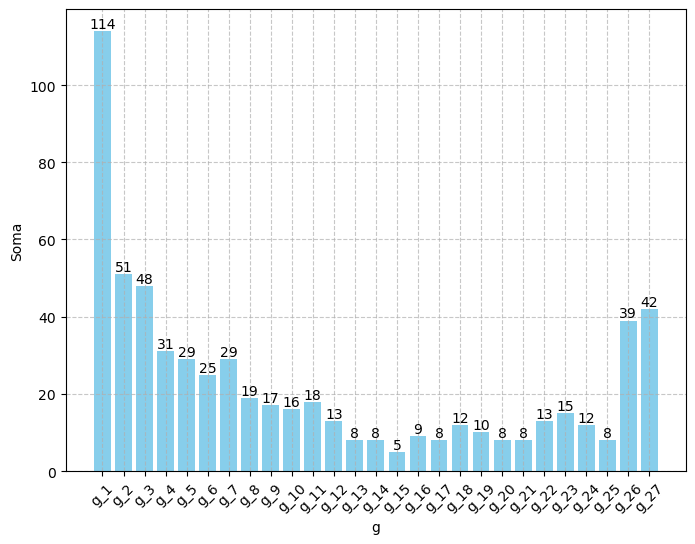

In [9]:
gs = ['g_{}'.format(i) for i in range(1, 28)]

plt.figure(figsize=(8, 6))
bars = plt.bar(gs, table_df.sum(axis=1).values, color='skyblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             '{}'.format(int(bar.get_height())), 
             ha='center', va='bottom')

plt.xlabel('g')
plt.ylabel('Soma')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
